In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

In [100]:
## generate hourly data for the whole year
idx = pd.date_range("2020-01-01",periods=365*24,freq="h")

In [103]:
idx

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-12-30 14:00:00', '2020-12-30 15:00:00',
               '2020-12-30 16:00:00', '2020-12-30 17:00:00',
               '2020-12-30 18:00:00', '2020-12-30 19:00:00',
               '2020-12-30 20:00:00', '2020-12-30 21:00:00',
               '2020-12-30 22:00:00', '2020-12-30 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [138]:
data={}
cities=["al","bf","ny","tc"]
for i in range(4):
    df=pd.read_excel('input_doe.xlsx',sheet_name=i)
    df['Date']=idx
    df=df.set_index('Date')
    data[cities[i]]=df

In [146]:
## Monthly temperature
cities=["al","bf","ny","tc"]
outdoor=pd.DataFrame()
for city in cities:
    outdoor[city]=data[city].outdoor.resample('M').mean()


Text(0, 0.5, 'OutdoorT (C)')

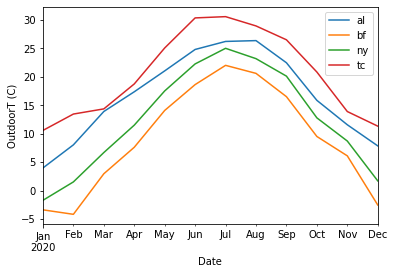

In [152]:
outdoor.plot.line()
plt.ylabel('OutdoorT (C)')

In [153]:
outdoor.mean(axis=0)

al    16.608487
bf     8.980654
ny    12.427633
tc    20.372944
dtype: float64

In [154]:
df.columns

Index(['outdoor', 'occ', 'lights', 'n', 'w', 'e', 'ew', 'n2', 's', 'sw',
       'floor', 'ceiling', 'tem', 'mass'],
      dtype='object')

## 1. Clearn the data with  occupanted hours and hvac on

In [ ]:
df_clear=df[(df['occ']!=0)&(df['mass']>0)]

In [260]:
def occ_hvac(df):
    df_clear=df[(df['occ']!=0)&(df['mass']>0)]
    cols=['tem' ,'mass','n',  'w', 's', 'sw', 'e', 'ew','floor', 'ceiling']
    walls=['n',  'w', 's', 'sw', 'e', 'ew', 'ceiling']
    
    df_all=df_clear[cols]
    df_walls=df_clear[walls]
    df_corr=df_walls.corrwith(df_all['floor'])
    df_diff=df_clear[walls].subtract(df_all['floor'],axis=0)
    
    
    return df_all,df_corr,df_diff


In [261]:
df_all={}
df_corr=pd.DataFrame()
df_diff={}
for city in cities:
    df=data[city]
    df_all[city],df_corr[city],df_diff[city]=occ_hvac(df)
    

In [262]:
df_ny=df_all['ny']
df_ny.corr()

,tem,mass,n,w,s,sw,e,ew,floor,ceiling
tem,1.000000,-0.024576,-0.323193,-0.383192,-0.373855,-0.354946,-0.374620,-0.163098,-0.354362,-0.299064
mass,-0.024576,1.000000,0.667107,0.631929,0.651125,0.592967,0.652631,0.635839,0.652876,0.679148
n,-0.323193,0.667107,1.000000,0.979063,0.974035,0.881244,0.970734,0.887144,0.973813,0.995705
w,-0.383192,0.631929,0.979063,1.000000,0.971536,0.904993,0.974473,0.828941,0.975709,0.963615
s,-0.373855,0.651125,0.974035,0.971536,1.000000,0.886626,0.991516,0.813570,0.955656,0.966002
sw,-0.354946,0.592967,0.881244,0.904993,0.886626,1.000000,0.882152,0.743206,0.916698,0.875454
e,-0.374620,0.652631,0.970734,0.974473,0.991516,0.882152,1.000000,0.821674,0.958619,0.962811
ew,-0.163098,0.635839,0.887144,0.828941,0.813570,0.743206,0.821674,1.000000,0.858860,0.904543
floor,-0.354362,0.652876,0.973813,0.975709,0.955656,0.916698,0.958619,0.858860,1.000000,0.970355
ceiling,-0.299064,0.679148,0.995705,0.963615,0.966002,0.875454,0.962811,0.904543,0.970355,1.000000


### 1.1 Correlation of surfaces with floor

In [230]:
df_corr=np.round(df_corr,2)

In [231]:
df_corr

,al,bf,ny,tc
n,0.98,0.98,0.97,0.96
w,0.98,0.98,0.98,0.95
s,0.93,0.97,0.96,0.85
sw,0.87,0.92,0.92,0.84
e,0.95,0.96,0.96,0.91
ew,0.86,0.90,0.86,0.73
floor,1.00,1.00,1.00,1.00
ceiling,0.98,0.98,0.97,0.96


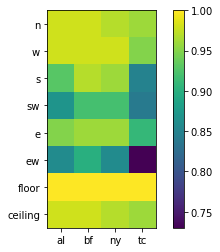

In [234]:
fig,ax=plt.subplots()
im=ax.imshow(df_corr)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(8))

ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.index)
plt.show()

### 2. Difference between surfaces and floor

In [263]:
df_diff['ny']

,n,w,s,sw,e,ew,ceiling
Date,,,,,,,
2020-01-02 08:00:00,1.771099,2.760126,-0.909496,-2.082275,-0.878702,-0.986563,-0.075000
2020-01-02 09:00:00,-0.169493,2.071908,-1.358643,0.689562,-1.266422,-4.754379,-1.268156
2020-01-02 10:00:00,-1.363682,0.826264,-1.269960,2.934503,-1.328668,-9.607742,-2.010153
2020-01-02 11:00:00,-1.679676,-0.227481,-0.860317,3.954287,-1.324569,-8.167607,-2.257535
2020-01-02 12:00:00,-1.717446,-0.615603,-0.409551,3.775097,-0.993518,-7.759693,-2.263114
...,...,...,...,...,...,...,...
2020-12-28 11:00:00,-1.694469,-0.349727,-1.344156,1.829117,-1.698218,-7.924571,-1.979009
2020-12-28 12:00:00,-1.060310,-0.024588,-0.321210,1.589023,-0.620753,-7.627042,-1.506477
2020-12-28 15:00:00,0.548039,1.451766,1.298071,-4.989868,1.031808,-5.632438,-0.042092


al 2314
bf 2314
ny 2314
tc 2314


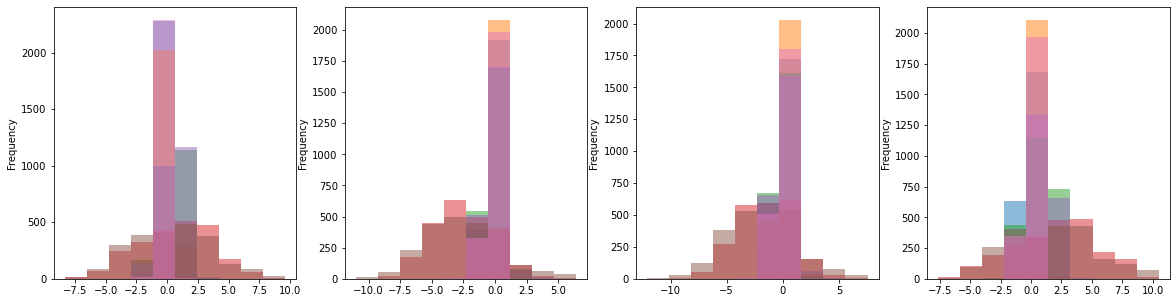

In [266]:
fig,axs=plt.subplots(1,4,figsize=(20,5))
i=0

for city in cities:
    df_diff[city].plot.hist(ax=axs[i],alpha=0.5,legend=False)
    print(city,len(df_diff[city]))
    i+=1

### 1. Look at the correlation of the variables

377
1937
844
1470
646
1668
133
2181


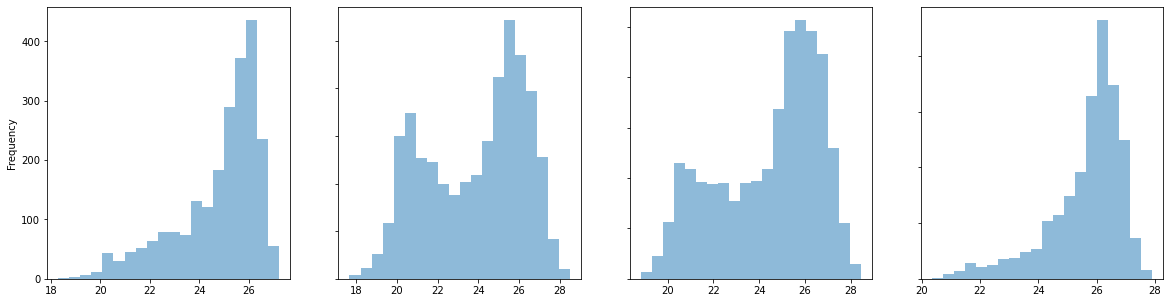

In [268]:
fig,axs2=plt.subplots(1,4,figsize=(20,5))
i=0

for city in cities:
    df_all[city].floor.plot.hist(ax=axs2[i],alpha=0.5,bins=20,sharex=True,sharey=True)
    i+=1

In [285]:
df_all['ny'].floor

Date
2020-01-02 08:00:00    19.546321
2020-01-02 09:00:00    21.832610
2020-01-02 10:00:00    23.230745
2020-01-02 11:00:00    24.031168
2020-01-02 12:00:00    24.419757
                         ...    
2020-12-28 11:00:00    25.127032
2020-12-28 12:00:00    24.337594
2020-12-28 15:00:00    22.036749
2020-12-28 16:00:00    21.423021
2020-12-28 17:00:00    21.131819
Name: floor, Length: 2314, dtype: float64

In [287]:
floor

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [288]:
import seaborn as sns

<AxesSubplot:>

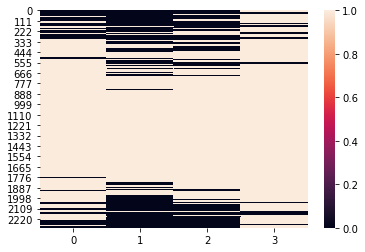

In [289]:
floor=pd.DataFrame()
for city in cities:
    floor[city]=df_all[city].floor>23
    
floor=floor*1
floor=floor.values
sns.heatmap(floor)

<AxesSubplot:>

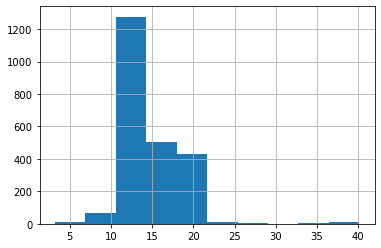

In [75]:
df_walls['tem'].hist()

<AxesSubplot:>

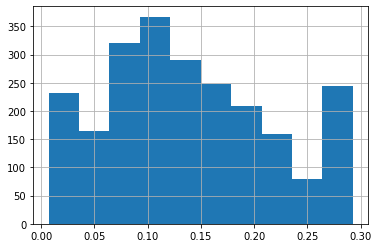

In [44]:
df_walls['mass'].hist()

<AxesSubplot:>

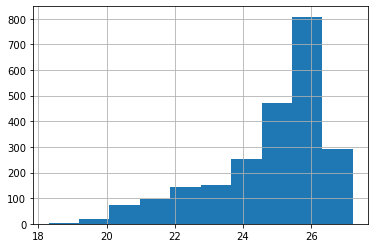

In [43]:
df_walls['floor'].hist()

In [57]:
df_clear.corr()
df_clear.plot.scatter(x='w',y='ww')

## Find the linear relationship between columns

In [22]:
import scipy.stats

In [34]:
slop=[]
inter=[]
R=[]
P=[]
for col in df_walls.columns:
    s,i,r,p,_=scipy.stats.linregress(df_walls['floor'],df_walls[col])
    slop.append(s)
    inter.append(i)
    R.append(r)
    P.append(p)

In [35]:
df_walls.columns

Index(['out', 'tem', 'n1', 's', 'sw', 'e', 'n2', 'w', 'ww', 'floor',
       'ceiling'],
      dtype='object')

In [36]:
df_walls.head()

,out,tem,n1,s,sw,e,n2,w,ww,floor,ceiling
Date,,,,,,,,,,,
01/01 01:00:00,3.100000,15.6,14.969495,14.516262,10.667356,15.032881,15.101662,14.494765,10.692775,15.072239,14.932036
01/01 02:00:00,-1.633333,15.6,14.845857,14.264236,9.572860,14.927319,15.003793,14.238915,9.637330,14.994772,14.838414
01/01 03:00:00,-2.033333,15.6,14.780562,14.032646,9.437750,14.868444,14.953579,14.010805,9.503474,14.961904,14.798600
01/01 04:00:00,-2.433333,15.6,14.736425,13.869836,9.268384,14.828190,14.917997,13.848420,9.336981,14.932588,14.763572
01/01 05:00:00,-2.775000,15.6,14.701547,13.752946,9.132531,14.795978,14.889475,13.729092,9.209504,14.906629,14.732734


In [42]:
P

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [37]:
slop

[3.627260236864492,
 0.7400413298195355,
 1.0634745724078094,
 1.2796716389917857,
 2.0104445188536872,
 1.0269098976400561,
 0.9707545427800546,
 1.2702633819882136,
 2.14513624450716,
 1.0,
 1.041054420159733]

In [38]:
inter

[-70.14255342073349,
 5.496891289624383,
 -1.320686908040745,
 -6.440125425046535,
 -24.644380325825363,
 -0.365597550705246,
 0.7901813933325386,
 -6.327249025646619,
 -28.148296094850263,
 0.0,
 -0.8531402106842982]

In [41]:
R

[0.9076722721379803,
 0.9303008005319711,
 0.9928427024648933,
 0.986482790345079,
 0.9426377088163466,
 0.9933964231623157,
 0.9953403702251147,
 0.9870135332641593,
 0.9488965966380327,
 1.0,
 0.9961253045325493]

In [13]:
interior_dif=df_walls.subtract(df_walls['floor'],axis=0)

In [14]:
interior_dif.head()

,tem,n1,s,sw,e,w,ww,floor,ceiling
Date,,,,,,,,,
01/01 01:00:00,0.527761,-0.102745,-0.555977,-4.404883,-0.039358,-0.577474,-4.379465,0.0,-0.140204
01/01 02:00:00,0.605228,-0.148915,-0.730536,-5.421912,-0.067453,-0.755857,-5.357442,0.0,-0.156358
01/01 03:00:00,0.638096,-0.181342,-0.929258,-5.524154,-0.093460,-0.951099,-5.458430,0.0,-0.163303
01/01 04:00:00,0.667412,-0.196163,-1.062752,-5.664204,-0.104398,-1.084168,-5.595607,0.0,-0.169016
01/01 05:00:00,0.693371,-0.205082,-1.153683,-5.774097,-0.110651,-1.177537,-5.697125,0.0,-0.173894


array([[<AxesSubplot:title={'center':'tem'}>,
        <AxesSubplot:title={'center':'n1'}>,
        <AxesSubplot:title={'center':'s'}>],
       [<AxesSubplot:title={'center':'sw'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'ww'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'ceiling'}>]], dtype=object)

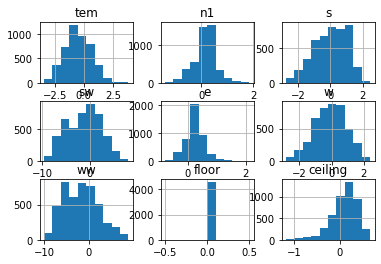

In [15]:
interior_dif.hist()

## Sampling the differences

In [ ]:
## https://campus.datacamp.com/courses/experimental-design-in-python/design-considerations-in-experimental-design?ex=5

### Step 1 Sampling the temperation combinations for heating and cooling season separately


In [ ]:
heating=

array([[<AxesSubplot:xlabel='tem', ylabel='tem'>,
        <AxesSubplot:xlabel='floor', ylabel='tem'>],
       [<AxesSubplot:xlabel='tem', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>]], dtype=object)

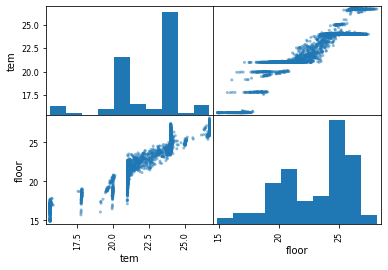

In [30]:
scatter_matrix(df_walls[['tem','floor']])

In [16]:
def sampling_diff(col,size=100):
    samples=np.random.choice(col,size=size)
    return samples
sample_diff=interior_dif.apply(lambda x: sampling_diff(x))

In [17]:
sample_diff

,tem,n1,s,sw,e,w,ww,floor,ceiling
0,-0.855131,0.456732,0.828288,-3.416012,0.351415,0.094228,-5.811956,0.0,0.250767
1,-0.684307,0.370723,0.230277,-2.823026,1.609619,-0.846964,6.696065,0.0,0.269739
2,-1.732345,0.262442,1.472038,-0.728165,0.162760,-0.779525,6.902571,0.0,0.350535
3,-1.836080,0.660648,-1.354666,3.339199,-0.189799,1.700411,-2.108007,0.0,0.201877
4,-0.343261,-0.187310,-0.355709,2.428853,0.236353,1.006197,-3.714211,0.0,-0.016773
...,...,...,...,...,...,...,...,...,...
95,0.456683,0.596712,1.284044,1.072915,0.202217,0.238451,0.812736,0.0,0.476436
96,0.493979,-0.306294,0.803953,-6.110152,0.174934,-0.384891,-4.899544,0.0,-0.379670
97,-1.731173,0.257420,-1.508844,-1.465586,0.286023,0.650407,-8.801144,0.0,0.136887
98,1.224706,0.118850,0.969805,-7.333974,0.009878,0.739022,2.171572,0.0,0.098339


### Step 2 Obtain the permutation of surface temperature and supply air

In [22]:
intv=1
interior_wall=np.arange(15,27,intv)
m_range=np.arange(0,0.4,intv/20)
tem_inx=np.arange(len(sample_diff)*len(interior_wall))


In [23]:
all_list=[tem_inx,m_range]

In [24]:
import itertools
res = list(itertools.product(*all_list))

In [25]:
len(res)

9600

### 2. Determine the temperature/mass flow range and interval

#### Temperature at mass flow @0

<AxesSubplot:>

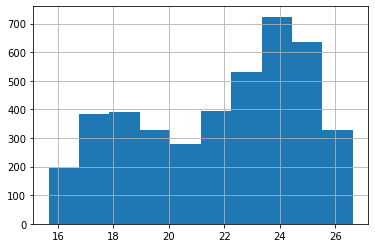

In [21]:
mass0=df.loc[df['Mass']==0,'Tem']
mass0.hist()

In [18]:
mass1_t=df.loc[df['Mass']!=0,'Tem']

<AxesSubplot:>

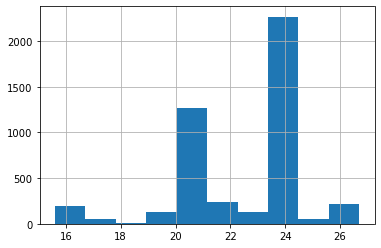

In [19]:
mass1_t.hist()

<AxesSubplot:>

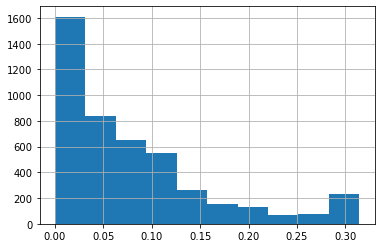

In [20]:
mass1_m=df.loc[df['Mass']!=0,'Mass']
mass1_m.hist()

### 3. Generate permutation combination of 6 parameters

In [71]:
intv=10

In [72]:
t_range=np.arange(15,27.4,intv)

In [73]:
m_range=np.arange(0,0.4,intv/30)

In [74]:
interior_wall=np.arange(15,27,intv)

In [75]:
exterior_windows=np.arange(9,35,intv)

In [76]:
exterior_walls=np.arange(13,30,intv)

In [77]:
# https://www.geeksforgeeks.org/python-all-possible-permutations-of-n-lists/
import itertools

In [94]:
all_list = [list(t_range), list(m_range), list(interior_wall),list(interior_wall),list(interior_wall),list(interior_wall),exterior_windows,exterior_windows,exterior_walls] 

In [95]:
res = list(itertools.product(*all_list))

In [83]:
df_walls

,tem,n1,s,sw,e,n2,w,ww,floor,ceiling
Date,,,,,,,,,,
01/01 01:00:00,15.60000,14.969495,14.516262,10.667356,15.032881,15.101662,14.494765,10.692775,15.072239,14.932036
01/01 02:00:00,15.60000,14.845857,14.264236,9.572860,14.927319,15.003793,14.238915,9.637330,14.994772,14.838414
01/01 03:00:00,15.60000,14.780562,14.032646,9.437750,14.868444,14.953579,14.010805,9.503474,14.961904,14.798600
01/01 04:00:00,15.60000,14.736425,13.869836,9.268384,14.828190,14.917997,13.848420,9.336981,14.932588,14.763572
01/01 05:00:00,15.60000,14.701547,13.752946,9.132531,14.795978,14.889475,13.729092,9.209504,14.906629,14.732734
...,...,...,...,...,...,...,...,...,...,...
12/31 10:00:00,15.60000,16.147595,14.641578,10.887634,16.438215,16.858946,14.630682,10.296089,16.851403,16.602854
12/31 21:00:00,15.60297,16.276156,15.415418,11.154105,16.663603,16.876878,15.292829,11.117149,16.881257,16.583474
12/31 22:00:00,15.60000,16.157759,15.190399,11.075251,16.529022,16.764695,15.103665,11.038029,16.783813,16.482705


In [84]:
df.columns

Index(['mass', 'tem', 'out', 'oc', 'n1', 's', 'sw', 'e', 'n2', 'w', 'ww',
       'floor', 'ceiling'],
      dtype='object')

In [105]:
table_cols=[ 'tem','mass','n1', 's', 'sw', 'e', 'n2', 'w', 'ww']

In [106]:
res_array=pd.DataFrame(res[:3],columns=table_cols)

In [107]:
res_array.to_csv('temperature.csv',index=False)

### 4. Seasonality

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries,  01/01  01:00:00 to  12/31  24:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mass     8760 non-null   float64
 1   tem      8760 non-null   float64
 2   out      8760 non-null   float64
 3   oc       8760 non-null   float64
 4   n1       8760 non-null   float64
 5   s        8760 non-null   float64
 6   sw       8760 non-null   float64
 7   e        8760 non-null   float64
 8   n2       8760 non-null   float64
 9   w        8760 non-null   float64
 10  ww       8760 non-null   float64
 11  floor    8760 non-null   float64
 12  ceiling  8760 non-null   float64
dtypes: float64(13)
memory usage: 958.1+ KB


In [40]:
x=np.ones((3,1))

In [41]:
x

array([[1.],
       [1.],
       [1.]])

In [44]:
y=np.random.randn(3,4)

In [45]:
y

array([[ 0.38572671,  0.21459598, -0.52690709,  0.97118098],
       [ 0.46340519, -1.1192759 , -0.05143312, -1.50103188],
       [-1.10826421,  0.22964593,  0.03112651, -0.21655543]])

In [46]:
y-x

array([[-0.61427329, -0.78540402, -1.52690709, -0.02881902],
       [-0.53659481, -2.1192759 , -1.05143312, -2.50103188],
       [-2.10826421, -0.77035407, -0.96887349, -1.21655543]])

In [58]:
np.random.randint(2,10,(3,4))

array([[9, 8, 8, 8],
       [8, 7, 9, 7],
       [4, 6, 5, 2]])

In [57]:
np.random.randint(2,10,3)

array([6, 3, 5])

In [56]:
np.random.randint(2,(3,4))

array([2, 3])